In [67]:
import pickle

p = pickle.load(open('output.pk', 'rb'))

y_test = np.array(p['y_test'], dtype = int)
y_pred_100 = p['y_pred_100']
y_pred_1000 = p['y_pred_1000']

In [147]:
import matplotlib.pyplot as plt
def get_margin_plot(y_pred, y_test, thresholds, legends = None, title=None, style=['b', 'r']):
    accuracy_1 = []
    accuracy_0 = []
    for thresh in thresholds:
        y_test_i = y_test[y_test == 1]
        y_pred_i = y_pred[y_test == 1]
        correct = np.sum(y_pred_i > thresh)
        accuracy_1.append(1.0 * correct / len(y_test_i))

        y_test_i = y_test[y_test == 0]
        y_pred_i = y_pred[y_test == 0]
        correct = np.sum(y_pred_i <= thresh)
        accuracy_0.append(1.0 * correct / len(y_test_i))
    
    error_1 = list(1 - np.array(accuracy_1))
    error_0 = list(1 - np.array(accuracy_0))
    
    plt.plot(thresholds/(np.max(thresholds) - np.min(thresholds)), error_1, style[0])
    plt.plot(thresholds/(np.max(thresholds) - np.min(thresholds)), error_0, style[1])
    if legends:
        plt.legend(legends)
    plt.xlabel('Margin Score')
    plt.ylabel('Error %')
    if title:
        plt.title(title)

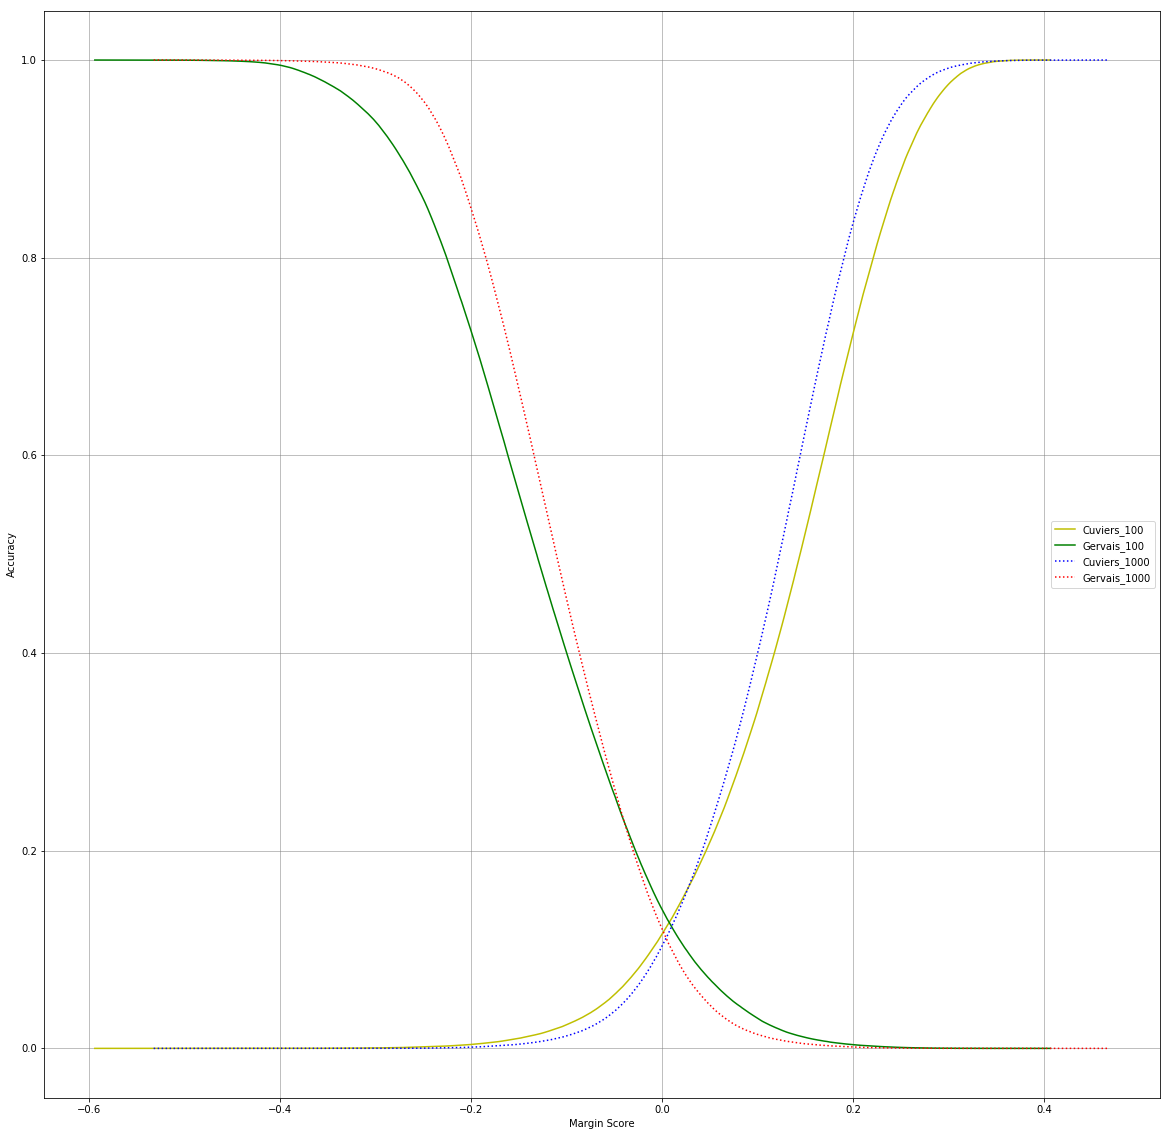

In [148]:
plt.figure(figsize=(20, 20))
legends = ['Cuviers_100', 'Gervais_100']
thresholds = sorted(np.unique(np.round(y_pred_100, 2)))
get_margin_plot(y_pred_100, y_test, thresholds, legends = legends, style=['y', 'g'])

legends = legends + ['Cuviers_1000', 'Gervais_1000']
thresholds = sorted(np.unique(np.round(y_pred_1000, 2)))
get_margin_plot(y_pred_1000, y_test, thresholds, legends = legends, style=['b:', 'r:'])

plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.show()

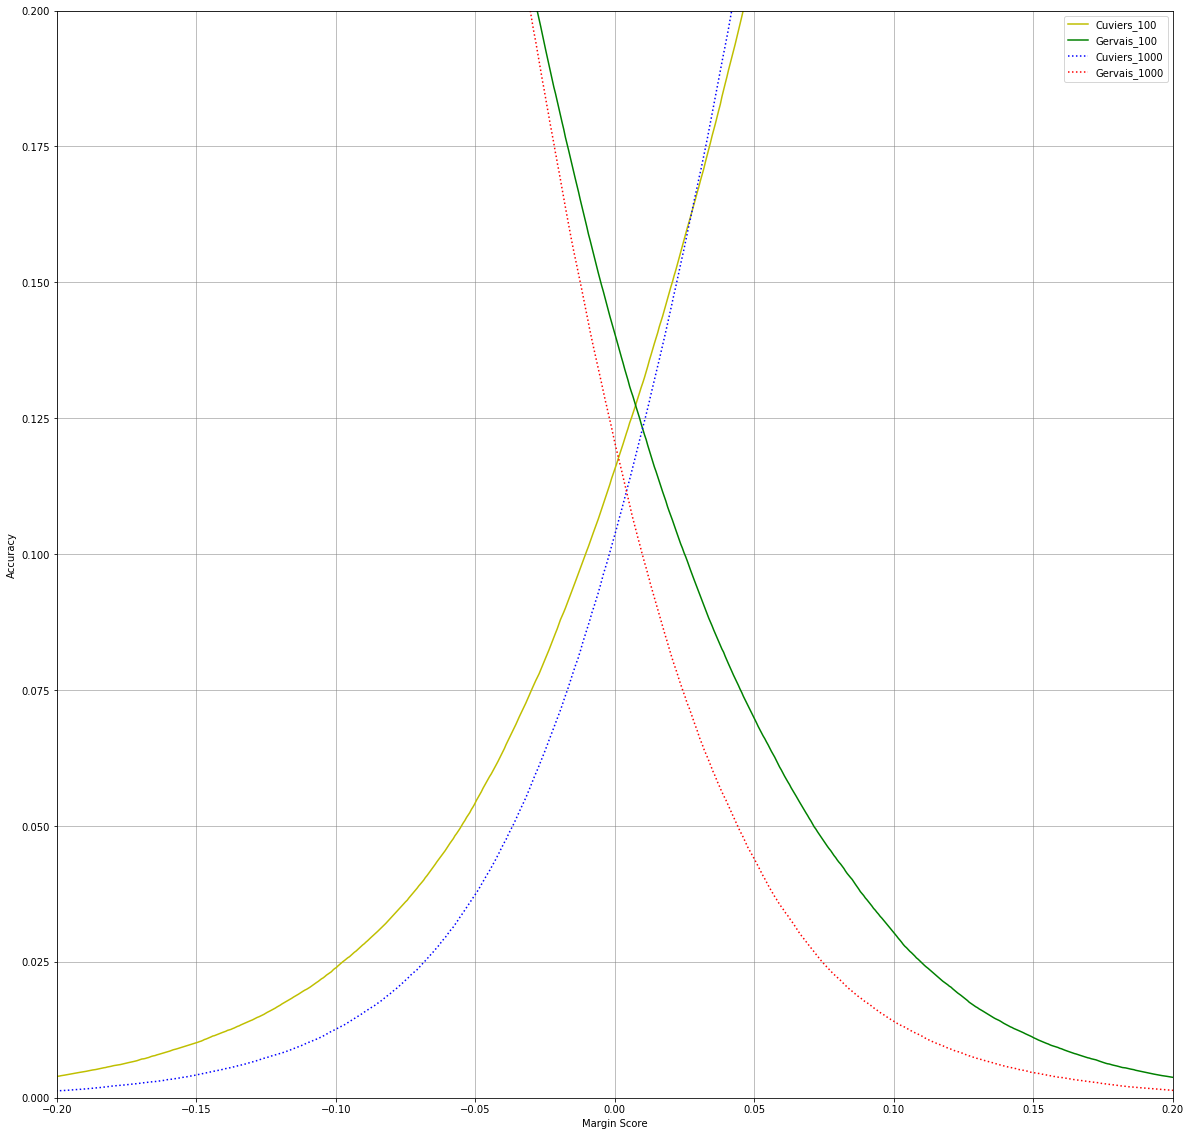

In [149]:
plt.figure(figsize=(20, 20))
legends = ['Cuviers_100', 'Gervais_100']
thresholds = sorted(np.unique(np.round(y_pred_100, 2)))
get_margin_plot(y_pred_100, y_test, thresholds, legends = legends, style=['y', 'g'])

legends = legends + ['Cuviers_1000', 'Gervais_1000']
thresholds = sorted(np.unique(np.round(y_pred_1000, 2)))
get_margin_plot(y_pred_1000, y_test, thresholds, legends = legends, style=['b:', 'r:'])

plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

plt.xlim([-0.2, 0.2])
plt.ylim([0, 0.2])
plt.show()

## ROC Curve

In [150]:
def statistics(y_pred, y_test, thr_lower, thr_upper):
    true_index = y_pred > thr_upper
    y_true =  np.sum(y_test[true_index] == 1)
    
    false_index = y_pred < thr_lower
    y_false =  np.sum(y_test[false_index] == 0)
    
    abstain = 1 - np.sum((y_pred < thr_lower) | (y_pred > thr_upper))/len(y_test)
    
    
    
    return (y_true+ y_false)/(len(y_test[true_index])+len(y_test[false_index])) , y_true/len(y_test[true_index]), y_false/len(y_test[false_index]), abstain 

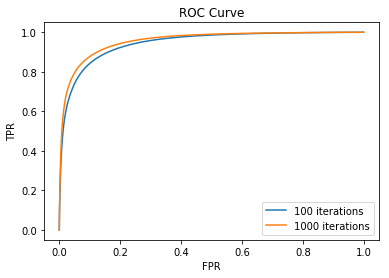

In [151]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_100)
plt.plot(fpr, tpr)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_1000)
plt.plot(fpr, tpr)
plt.legend(['100 iterations','1000 iterations'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC Curve")
plt.show()

In [152]:
thr_lower_index = np.min(np.where((tpr > 0.95) & (fpr > 0.4)))
thr_upper_index = np.max(np.where((tpr < 0.5) & (fpr  < 0.05)))
thr_lower, thr_upper = thresholds[thr_lower_index], thresholds[thr_upper_index]
print("Thresholds:", thr_lower, thr_upper)
acc,cuvier_acc, gervais_acc, abstain = statistics(y_pred_1000, y_test, thr_lower, thr_upper)
print("Accuracy: %f,\nCuvier Accuracy: %f,\nGervais Accuracy: %f,\nAbstain: %f" % (acc, cuvier_acc, gervais_acc, abstain))

Thresholds: -2.1069674 2.9975965
Accuracy: 0.976855,
Cuvier Accuracy: 0.985415,
Gervais Accuracy: 0.968822,
Abstain: 0.440469


In [153]:
thr_lower_index = np.min(np.where((tpr > 0.95)))
thr_upper_index = np.max(np.where((tpr  < 0.6)))
thr_lower, thr_upper = thresholds[thr_lower_index], thresholds[thr_upper_index]
print("Thresholds:", thr_lower, thr_upper)
acc,cuvier_acc, gervais_acc, abstain = statistics(y_pred_1000, y_test, thr_lower, thr_upper)
print("Accuracy: %f,\nCuvier Accuracy: %f,\nGervais Accuracy: %f,\nAbstain: %f" % (acc, cuvier_acc, gervais_acc, abstain))

Thresholds: -0.8911903 2.4364197
Accuracy: 0.953639,
Cuvier Accuracy: 0.979913,
Gervais Accuracy: 0.931645,
Abstain: 0.282628


In [154]:
thr_lower_index = np.min(np.where((tpr > 0.92)))
thr_upper_index = np.max(np.where((tpr  < 0.3)))
thr_lower, thr_upper = thresholds[thr_lower_index], thresholds[thr_upper_index]
print("Thresholds:", thr_lower, thr_upper)
acc,cuvier_acc, gervais_acc, abstain = statistics(y_pred_1000, y_test, thr_lower, thr_upper)
print("Accuracy: %f,\nCuvier Accuracy: %f,\nGervais Accuracy: %f,\nAbstain: %f" % (acc, cuvier_acc, gervais_acc, abstain))

Thresholds: -0.33540213 4.0489326
Accuracy: 0.926162,
Cuvier Accuracy: 0.990632,
Gervais Accuracy: 0.902342,
Abstain: 0.401091


In [155]:
thr_lower_index = np.min(np.where((tpr > 0.5)))
thr_upper_index = np.max(np.where((tpr  <= 0.5)))
thr_lower, thr_upper = thresholds[thr_lower_index], thresholds[thr_upper_index]
print("Thresholds:", thr_lower, thr_upper)
acc,cuvier_acc, gervais_acc, abstain = statistics(y_pred_1000, y_test, thr_lower, thr_upper)
print("Accuracy: %f,\nCuvier Accuracy: %f,\nGervais Accuracy: %f,\nAbstain: %f" % (acc, cuvier_acc, gervais_acc, abstain))

Thresholds: 2.9968336 2.9975965
Accuracy: 0.729165,
Cuvier Accuracy: 0.985415,
Gervais Accuracy: 0.633958,
Abstain: 0.000093


In [156]:
thr_lower_index = np.min(np.where((tpr > 0.98)))
thr_upper_index = np.max(np.where((tpr  <= 0.5)))
thr_lower, thr_upper = thresholds[thr_lower_index], thresholds[thr_upper_index]
print("Thresholds:", thr_lower, thr_upper)
acc,cuvier_acc, gervais_acc, abstain = statistics(y_pred_1000, y_test, thr_lower, thr_upper)
print("Accuracy: %f,\nCuvier Accuracy: %f,\nGervais Accuracy: %f,\nAbstain: %f" % (acc, cuvier_acc, gervais_acc, abstain))

Thresholds: -1.9137416 2.9975965
Accuracy: 0.974601,
Cuvier Accuracy: 0.985415,
Gervais Accuracy: 0.964997,
Abstain: 0.424135
